#Calculation fo Survival Fraction
- Alpha beta values can be gathered from literature
- Will vary dose per fraction based on either a mean dose difference, or different dose each day


From the LQ-Model
$P(Survival) = exp(-\alpha D - \beta D^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Standard Survival Fraction Calc
Note: This will need to be turned into different fractions...

In [97]:
alpha = 0.15 # define alpha beta values assumed - this will come from literature
alphabeta = 3
beta = alpha/alphabeta

###Plot if dose was given in a *Single Fraction*

In [82]:
Dose = np.arange(0,101,1) #set of doses 0-100 in 1Gy intervals

In [84]:
SF = np.exp(-alpha*Dose - beta*Dose**2)
SF098 = np.exp(-alpha*(Dose*0.98) - beta*(Dose*0.98)**2) # if 98% of dose is delivered

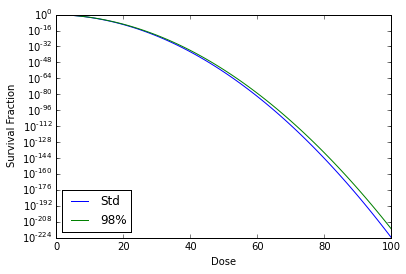

In [85]:
plt.semilogy(Dose,SF, label='Std')
plt.semilogy(Dose,SF098, label='98%')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
plt.legend(loc='lower left')

### Fractionated RT

In [6]:
NoFrac = np.arange(0,51,1) # number of fractions
DoseFrac = 2 # dose per fraction
Dtot = NoFrac * DoseFrac # total dose

In [7]:
SFn = (np.exp(-(alpha*DoseFrac)-(beta*(DoseFrac**2))))**NoFrac

###Plot of fractionated SF 
 - Straight line as only plotting the individual point after each fraction

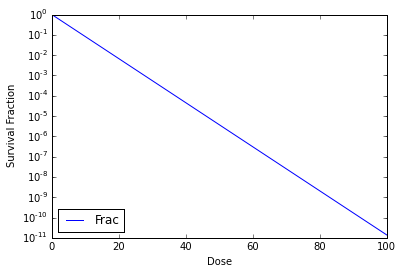

In [8]:
plt.semilogy(Dtot,SFn, label='Frac')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
#plt.xlim(0,10)
#plt.ylim(1E-5,1)
plt.legend(loc='lower left')

###Plot comparison of single vs fractionated doses
- Note that 100Gy single fraction results in almost no SF, hence reduced axis ranges

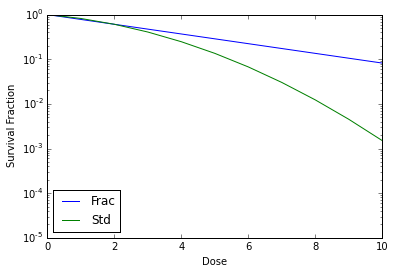

In [9]:
plt.semilogy(Dtot,SFn, label='Frac')
plt.semilogy(Dose,SF, label='Std')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
plt.xlim(0,10)
plt.ylim(1E-5,1)
plt.legend(loc='lower left')

###Now for varying dose per fraction
- Have a mean shift, and a standard deviation to get results from?
- Start with just a min and max allowed range

1. Array with number of fractions
2. Array with delivered dose per fraction
    - This will be a calcualted distribution based on the OP data collected.
    - e.g. mean shift of -1%, with a range of +/-0.5% to give a range of doses -1.5 to -0.5%
3. Use these doses to calculate the SF as we go along using adjusted (due to varying fraction size) equation from above:
$$SF_{var} = SF_{n-1} \cdot [exp(-\alpha d - \beta d^2)]$$
4. Calcualte ratio of *Standard* and *Adjusted* SFs
$$SF_n = [exp(-\alpha d - \beta d^2)]^n$$

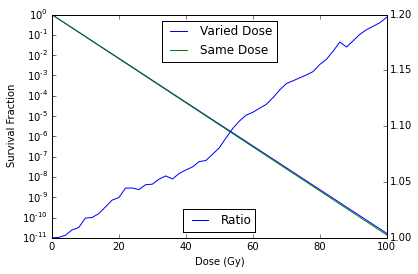

In [105]:
# 1. Array of number of fractions

NoFrac = np.arange(0,51,1)

# 2. Array with delivered dose per fraction
## Normal distribution around a mean with a SD (Make sure convert dose shift to Gy form %)

shift_mean = -1.0
shift_sd = 0.8

dose_shift=np.random.normal(loc = shift_mean/100, scale = shift_sd/100, size=len(NoFrac)-1) # normal distribution of numbers. loc = mean, scale = SD, size = array shape

dose_nominal = 2
dose_actual = dose_nominal + dose_shift # Delievered dose = nominal dose + dose shift

# 3. Calculate SF as it goes along

# calculate SF assuming constant dose/frac
SFn = (np.exp(-(alpha*DoseFrac)-(beta*(DoseFrac**2))))**NoFrac

# calculate varied SF based on random dose/frac (dose_actual)
# SF calcualted after each fraction and added to array which starts with SF=1 at Dose=0 
SFvar = np.array([1])
for i in range (0, len(NoFrac)-1):
    SFvar = np.append(SFvar,[SFvar[-1]*(np.exp(-(alpha*dose_actual[i])-(beta*(dose_actual[i]**2))))])
    
# 4. Calculate ratio between standard and varied doses to plot on right hand axis (Varied/Same dose)
SFratio = SFvar/SFn

# plot results
plt.semilogy(NoFrac*DoseFrac,SFvar, label='Varied Dose') # convert number of fractions to expected dose
plt.semilogy(Dtot,SFn, label='Same Dose')
plt.legend(loc = 'upper center')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose (Gy)')
plt2 = plt.twinx()
plt2.plot(NoFrac*DoseFrac, SFratio, label='Ratio')
plt2.legend(loc='lower center')

###So Far...
- Have calcualted Survival fractoin based on:
    - Constant dose per fraction
    - Varied dose per fractoin based on a mean shift and normally distributed variation (specifying SD)